In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
img_array = cv2.imread('/content/drive/MyDrive/DriverDrowsiness/dataset_new/train/Closed_eyes/_23.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
from PIL import Image

In [ ]:
img_array.size


14204

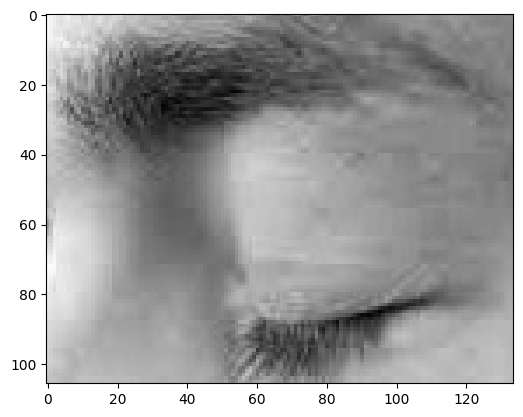

In [ ]:
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

(106, 134)

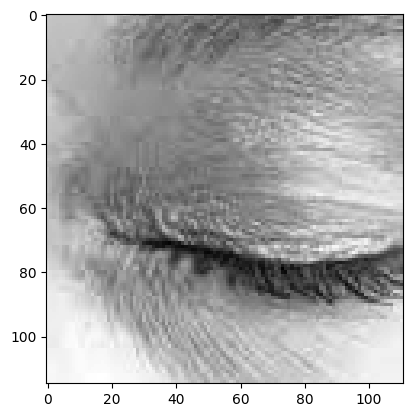

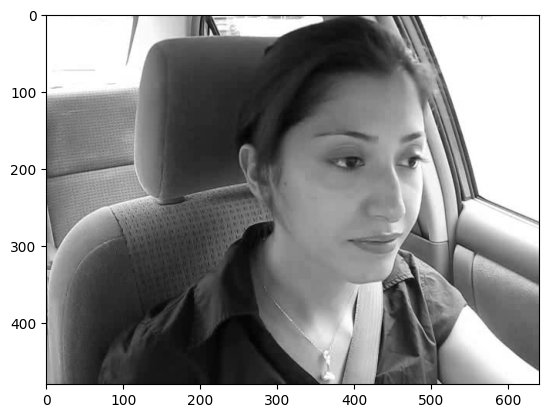

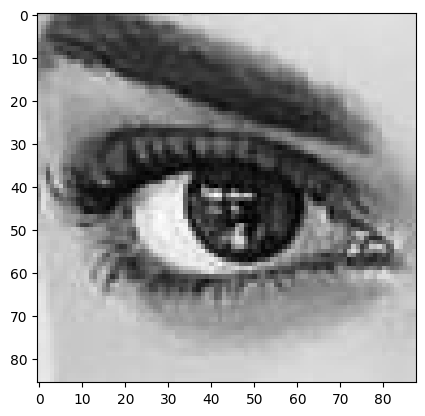

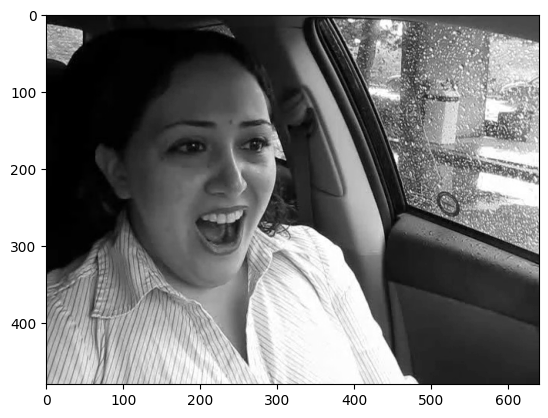

In [ ]:
Datadirectory= '/content/drive/MyDrive/DriverDrowsiness/dataset_new/train'
Classes=['Closed_eyes','no_yawn','Open_eyes','yawn']
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      backtogrb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
      plt.imshow(img_array, cmap='gray')
      plt.show()
      break

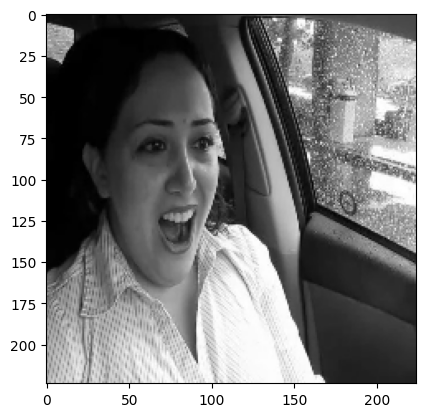

In [ ]:
image_size= 224
new_array= cv2.resize(backtogrb, (image_size, image_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_Data = []

def create_training_Data():
  for category in Classes:
    path= os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtogrb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2BGR)
        new_array=cv2.resize(backtogrb, (image_size,image_size))
        training_Data.append([new_array,class_num])


In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

2465


In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
X = []
Y = []
for features,label in training_Data:
  X.append(features)
  Y.append(label)

X = np.array(X).reshape(-1, image_size, image_size, 3)

In [ ]:
Y = np.array(Y)

In [ ]:
X.shape

(2465, 224, 224, 3)

In [ ]:
X= X/255.0

In [ ]:
import pickle
pickle_out= open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
Y= pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer= layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
new_model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs= 10, validation_split= 0.1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


70/70 [==============================] - 516s 7s/step - loss: 0.0000e+00 - accuracy: 0.4229 - val_loss: 0.0000e+00 - val_accuracy: 0.5182
Epoch 2/10
70/70 [==============================] - 503s 7s/step - loss: 0.0000e+00 - accuracy: 0.4892 - val_loss: 0.0000e+00 - val_accuracy: 0.5182
Epoch 3/10
70/70 [==============================] - 483s 7s/step - loss: 0.0000e+00 - accuracy: 0.4878 - val_loss: 0.0000e+00 - val_accuracy: 0.5182
Epoch 4/10
70/70 [==============================] - 490s 7s/step - loss: 0.0000e+00 - accuracy: 0.4923 - val_loss: 0.0000e+00 - val_accuracy: 0.5182
Epoch 5/10
70/70 [==============================] - 490s 7s/step - loss: 0.0000e+00 - accuracy: 0.4779 - val_loss: 0.0000e+00 - val_accuracy: 0.5142
Epoch 6/10
70/70 [==============================] - 482s 7s/step - loss: 0.0000e+00 - accuracy: 0.4874 - val_loss: 0.0000e+00 - val_accuracy: 0.5182
Epoch 7/10
70/70 [==============================] - 489s 7s/step - loss: 0.0000e+00 - accuracy: 0.4581 - val_loss: 0.